<a href="https://colab.research.google.com/github/LennyRBriones/pytorch/blob/main/linear_regression_model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Which version are we using
torch.__version__

'2.0.1+cu118'

## Data Generating

Here we´re creating an unidimentional tensor called "X" containing multiple values, using the function `arrange`

The function `unsqueeze` is being use to add an aditional dimention to the tensor.

In other words, this code creates a tensor with column containing a range of values

In [ ]:
# generating new parameters

volume = 0.8
bias = 0.2

# Creating data

start = 0
final = 1
step = 0.025

x = torch.arange(start, final, step).unsqueeze(dim=1)
print(f"the shape of x: {x.shape}")
y = volume * x + bias
print(f"The shape of y: {y.shape}" )

x[:10], y[:10]
# getting values until the 10th

the shape of x: torch.Size([40, 1])
The shape of y: torch.Size([40, 1])


(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

## Split Data



*   **Train Data**: The model learn with this data
*   **Test Data**: The model evaluate using this data to know how much did learn



In [ ]:
train_data = int(0.7 * len(x)) # Get the 70% of the data for training porpuse

x_train, y_train = x[:train_data], y[:train_data]
# Get the data from axis X & axis Y from start to train split

x_test, y_test = x[train_data:], y[train_data:]

In [ ]:
len(x_train), len(x_test)

(28, 12)

In [ ]:
def plot_prediction(data_train = x_train,
                    label_train = y_train,
                    data_test = x_test,
                    label_test = y_test,
                    predictions=None):

    plt.figure(figsize=(10, 10))

    # trace the data train in Green
    plt.scatter(data_train, label_train, c="g", s =6, label ="Train data")

    # trace the data train in Yellow
    plt.scatter(data_test, label_test, c="y", s =6, label ="Test data")

    if predictions is not None:
      # Trace the prediction in red
      plt.scatter(data_test, predictions, c="r", s=6, label="Predictions")

    #Text
    plt.legend(prop={"size": 12})

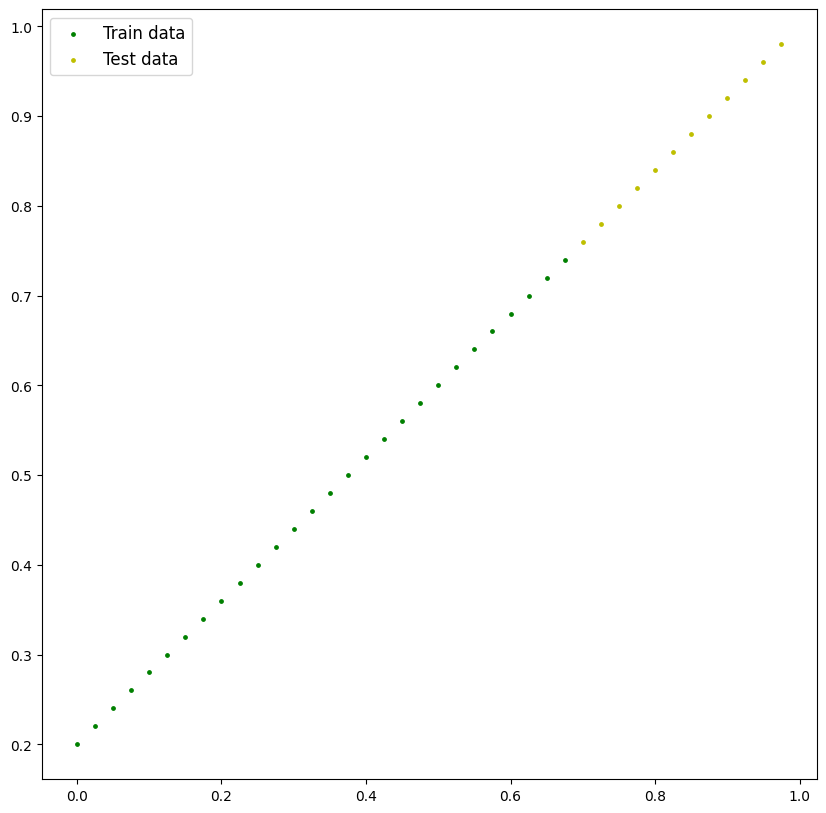

In [ ]:
plot_prediction();

# Model Bulding

In [ ]:
# Creating the model class to lineal regression

class LinearRegressionModel(nn.Module):
  def __init__(self): #initialazing a nn Model
    super().__init__()
    ## first layer volume
    self.volume = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
                     #Parameters means a value that can be trainable

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

# Realize the math of the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.volume * x + self.bias

`torch.manual_seed(42)` this command generate a seed that stores random numbers but always the same if we indicate the number of the seed.
This is a good question way to keep results & make experiments in machine learning

In [ ]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

In [ ]:
model_1

LinearRegressionModel()

`state.dict()` return the dictionary that contains the values of all trainable parameters, being useful to save and load models

In [ ]:
model_1.state_dict()

OrderedDict([('volume', tensor([0.8823])), ('bias', tensor([-0.6382]))])

## Predictions using `torch.inference_mode()`

In [ ]:
# Making predictions in the model

with torch.inference_mode():
  y_prediction = model_1(x_test)

`torch.inference_mode` is used to make predictions, also turns of some options like gradient following (necessary just for training, no in predictions)

In [ ]:
y_prediction

tensor([[-0.0206],
        [ 0.0015],
        [ 0.0235],
        [ 0.0456],
        [ 0.0677],
        [ 0.0897],
        [ 0.1118],
        [ 0.1338],
        [ 0.1559],
        [ 0.1779],
        [ 0.2000],
        [ 0.2221]])

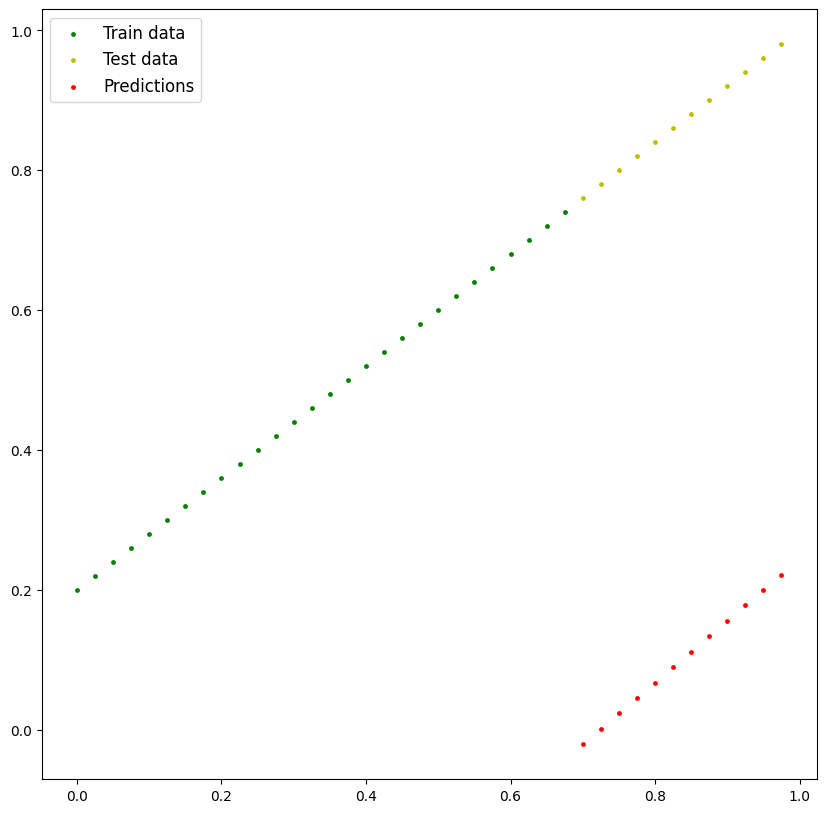

In [ ]:
plot_prediction(predictions = y_prediction)

As we can see, it's just a test to see how to make predictions, here is neccesary train the model to make the true predictions

## Loss Function

In [ ]:
# Loss function
loss_fn = torch.nn.L1Loss()

# Optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=.01 )


In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
model_1.parameters()

<generator object Module.parameters at 0x7fe8160f6960>

In [ ]:
loss_fn

L1Loss()

In [ ]:
torch.manual_seed(42)

# The number of epochs that the model will run
epochs = 100

# Empty lists to follow the model
training_loss = []
test_loss = []

for epoch in range(epochs):
  ## Training

  # Taking the model to train
  model_1.train()

  # 1.Using Fordward in the data
  y_prediction = model_1(x_train)

  # 2. Getting te value off the loss (difference beetween predictions and model)
  loss = loss_fn(y_prediction, y_train)

  # 3. Optimizer gradient
  optimizer.zero_grad()


  # 4. Loss Backward
  loss.backward()

  # 5. Progress optimizer
  optimizer.step()

  ### Test Function

  # Model in mode evaluation

  model_1.eval()

  with torch.inference_mode():

    # 1 Resend test_data
    test_prediction = model_1(x_test)

    # 2 Getting the loss in test data
    loss_test = loss_fn(test_prediction, y_test.type(torch.float))

    # Print the following
    if epoch % 10 == 0:
      training_loss.append(loss.detach().numpy())
                              #detach allows transform to numpy
      test_loss.append(loss_test.detach().numpy())
      print(f"Epoch: {epoch} | Training loss: {loss} | Test loss {loss_test} ")

Epoch: 0 | Training loss: 0.8103882670402527 | Test loss 0.7564272284507751 
Epoch: 10 | Training loss: 0.6989977955818176 | Test loss 0.6281616687774658 
Epoch: 20 | Training loss: 0.5876073241233826 | Test loss 0.49989619851112366 
Epoch: 30 | Training loss: 0.4762168228626251 | Test loss 0.3716306984424591 
Epoch: 40 | Training loss: 0.36482614278793335 | Test loss 0.2433648556470871 
Epoch: 50 | Training loss: 0.25343528389930725 | Test loss 0.11509871482849121 
Epoch: 60 | Training loss: 0.14204449951648712 | Test loss 0.023598840460181236 
Epoch: 70 | Training loss: 0.06647782027721405 | Test loss 0.1067611575126648 
Epoch: 80 | Training loss: 0.055072374641895294 | Test loss 0.1320054680109024 
Epoch: 90 | Training loss: 0.05138111859560013 | Test loss 0.13504832983016968 


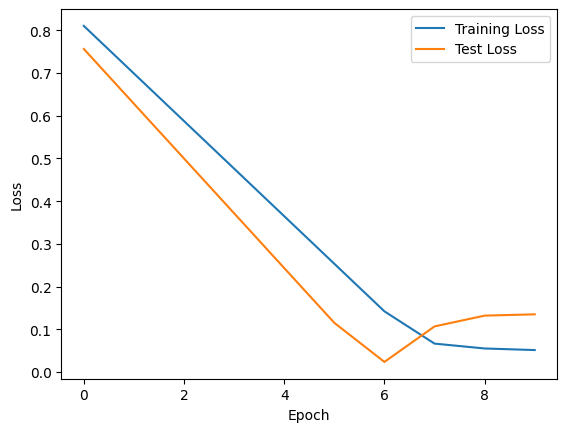

In [ ]:
# Tracing graph
plt.plot(training_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Inference in evaluate mode

In [ ]:
model_1.eval()

with torch.inference_mode():

# This is just in case we are using cuda
#  model_1.to(device)
#  x_test = x_test.to(device)
   y_prediction = model_1(x_test)

In [ ]:
y_prediction

tensor([[0.8522],
        [0.8791],
        [0.9060],
        [0.9329],
        [0.9598],
        [0.9867],
        [1.0136],
        [1.0405],
        [1.0674],
        [1.0943],
        [1.1212],
        [1.1481]])

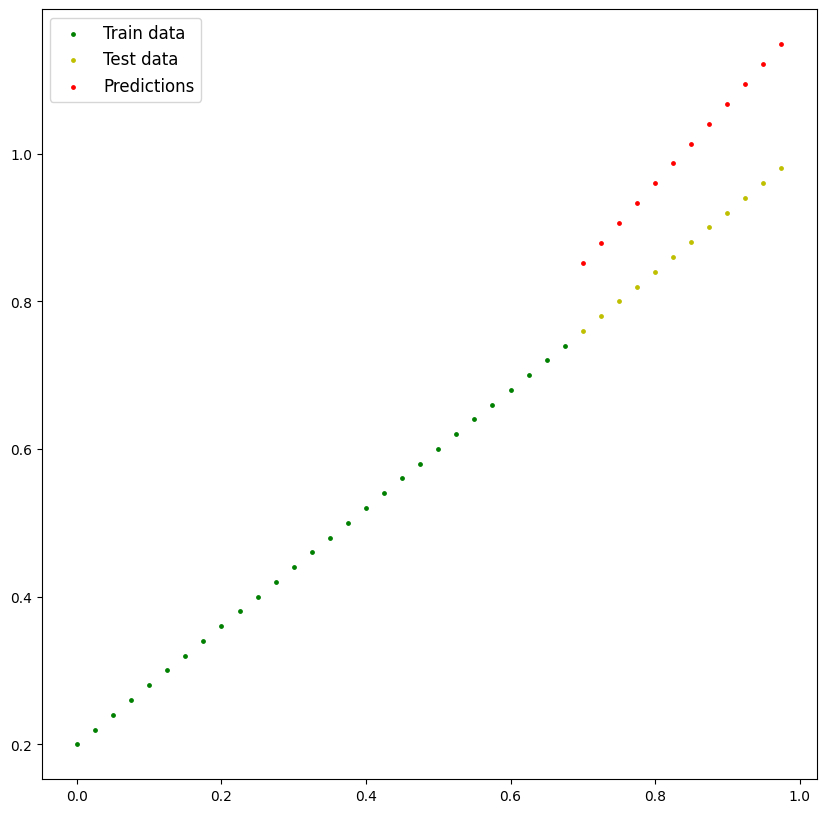

In [ ]:
plot_prediction(predictions = y_prediction)